In [177]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [178]:
(x_train, y_train), _ = mnist.load_data()
x_train = x_train / 255.0

x_train = np.expand_dims(x_train, axis=3)

print(x_train.shape)
print(y_train.shape)

num_classes = 10

(60000, 28, 28, 1)
(60000,)


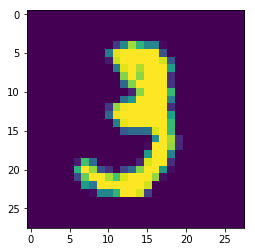

3


In [179]:
plt.imshow(np.squeeze(x_train[10]))
plt.show()
print(y_train[10])

In [180]:
'''def generator(z, y, reuse=False, verbose=True):
    
    with tf.variable_scope("generator", reuse=reuse):
        # Concatenate noise and conditional one-hot variable
        inputs = tf.concat([z, y], 1)

        # FC layer
        fc1 = tf.layers.dense(inputs=inputs, units= 7 * 7 * 128, activation=tf.nn.leaky_relu)

        reshaped = tf.reshape(fc1, shape=[-1, 7, 7, 128])

        upconv1 = tf.layers.conv2d_transpose(inputs=reshaped,
                                            filters=32,
                                            kernel_size=[5,5],
                                            kernel_initializer=tf.truncated_normal_initializer(stddev=0.1),
                                            strides=[2,2],
                                            activation=tf.nn.leaky_relu,
                                            padding='same', 
                                            name='upscore1')
        
        upconv2 = tf.layers.conv2d_transpose(inputs=upconv1,
                                            filters=1,
                                            kernel_size=[3,3],
                                            kernel_initializer=tf.truncated_normal_initializer(stddev=0.1),
                                            strides=[2,2],
                                            activation=None,
                                            padding='same', 
                                            name='upscore2')
        
        prob = tf.nn.sigmoid(upconv2)
        
        if verbose:
            print("\nGenerator:")
            print(inputs)
            print(fc1)
            print(reshaped)
            print(upconv1)
            print(upconv2)
    
    return prob


def discriminator(x, y, reuse=False, verbose=True):
    
    with tf.variable_scope("discriminator", reuse=reuse):      
        
        conv1 = tf.layers.conv2d(inputs=x, 
                                filters=64, 
                                kernel_size=[5,5], 
                                kernel_initializer=tf.truncated_normal_initializer(stddev=0.1),
                                strides=[1,1], 
                                activation=tf.nn.leaky_relu, 
                                padding='same', 
                                name='Conv1')
        
        pool1 = tf.layers.max_pooling2d(inputs=conv1, 
                                        pool_size=[2,2], 
                                        strides=[2,2], 
                                        padding='same', 
                                        name='Pool1')
        
        
        conv2 = tf.layers.conv2d(inputs=pool1, 
                                filters=32, 
                                kernel_size=[3,3], 
                                kernel_initializer=tf.truncated_normal_initializer(stddev=0.1),
                                strides=[2,2], 
                                activation=tf.nn.leaky_relu,  
                                padding='same', 
                                name='Conv2')
        
        pool2 = tf.layers.max_pooling2d(inputs=conv2, 
                                        pool_size=[2,2], 
                                        strides=[2,2], 
                                        padding='same', 
                                        name='Pool2')

        flattened = tf.layers.flatten(pool2)
        concatened = tf.concat([flattened, y], 1)
        fc1 = tf.layers.dense(inputs=concatened, units=256, activation=tf.nn.leaky_relu)
        fc2 = tf.layers.dense(inputs=fc1, units=1, activation=None)
        prob = tf.nn.sigmoid(fc2)
        
        if verbose:
            print("\nDiscriminator:")
            print(conv1)
            print(pool1)
            print(conv2)
            print(pool2)
            print(flattened)
            print(concatened)
            print(fc1)
            print(fc2)
        
    return prob, fc2


def sample_Z(batch_size, img_size):
    # Sample noise for generator
    return np.random.uniform(-1., 1., size=[batch_size, img_size])


def one_hot(batch_size, num_classes, labels):
    assert(batch_size == len(labels))
    y_one_hot = np.zeros(shape=[batch_size, num_classes])
    y_one_hot[np.arange(batch_size), labels] = 1
    
    return y_one_hot'''

'def generator(z, y, reuse=False, verbose=True):\n    \n    with tf.variable_scope("generator", reuse=reuse):\n        # Concatenate noise and conditional one-hot variable\n        inputs = tf.concat([z, y], 1)\n\n        # FC layer\n        fc1 = tf.layers.dense(inputs=inputs, units= 7 * 7 * 128, activation=tf.nn.leaky_relu)\n\n        reshaped = tf.reshape(fc1, shape=[-1, 7, 7, 128])\n\n        upconv1 = tf.layers.conv2d_transpose(inputs=reshaped,\n                                            filters=32,\n                                            kernel_size=[5,5],\n                                            kernel_initializer=tf.truncated_normal_initializer(stddev=0.1),\n                                            strides=[2,2],\n                                            activation=tf.nn.leaky_relu,\n                                            padding=\'same\', \n                                            name=\'upscore1\')\n        \n        upconv2 = tf.layers.conv2d_transpos

In [185]:
def generator(z, y, reuse=False, verbose=True):
    
    with tf.variable_scope("generator", reuse=reuse):
        inputs = tf.concat([z, y], 1)
        
        fc1 = tf.layers.dense(inputs=inputs, units=128, activation=tf.nn.leaky_relu)
        fc2 = tf.layers.dense(inputs=fc1, units=784, activation=None)
        logits = tf.nn.sigmoid(fc2)
        
        if verbose:
            print("\nGenerator:")
            print(inputs)
            print(fc1)
            print(fc2)
        
    return logits


def discriminator(x, y, reuse=False, verbose=True):
    
    with tf.variable_scope("discriminator", reuse=reuse):
        inputs = tf.concat([x, y], 1)
        fc1 = tf.layers.dense(inputs=inputs, units=256, activation=tf.nn.leaky_relu)
        fc2 = tf.layers.dense(inputs=fc1, units=1, activation=None)
        prob = tf.nn.sigmoid(fc2)
        
        if verbose:
            print("\nDiscriminator:")
            print(inputs)
            print(fc1)
            print(fc2)
        
    return prob, fc2

In [187]:
tf.reset_default_graph()

# Discriminator input
#X = tf.placeholder(tf.float32, shape=[None, x_train.shape[1], x_train.shape[2], 1], name='X')
X = tf.placeholder(tf.float32, shape=[None, x_train.shape[1] * x_train.shape[2] * 1], name='X')

# Generator noise input
Z_dim = 100
Z = tf.placeholder(tf.float32, shape=[None, Z_dim], name='Z')

# Generator conditional
Y = tf.placeholder(tf.float32, shape=[None, num_classes], name='Y')

# Print shapes
print("Inputs:")
print("Discriminator input: " + str(X))
print("Conditional variable: " + str(Y))
print("Generator input noise: " + str(Z))

# Networks
gen_sample = generator(Z, Y)
D_real, D_logit_real = discriminator(X, Y)
D_fake, D_logit_fake = discriminator(gen_sample, Y, reuse=True, verbose=False)

Inputs:
Discriminator input: Tensor("X:0", shape=(?, 784), dtype=float32)
Conditional variable: Tensor("Y:0", shape=(?, 10), dtype=float32)
Generator input noise: Tensor("Z:0", shape=(?, 100), dtype=float32)

Generator:
Tensor("generator/concat:0", shape=(?, 110), dtype=float32)
Tensor("generator/dense/LeakyRelu:0", shape=(?, 128), dtype=float32)
Tensor("generator/dense_1/BiasAdd:0", shape=(?, 784), dtype=float32)

Discriminator:
Tensor("discriminator/concat:0", shape=(?, 794), dtype=float32)
Tensor("discriminator/dense/LeakyRelu:0", shape=(?, 256), dtype=float32)
Tensor("discriminator/dense_1/BiasAdd:0", shape=(?, 1), dtype=float32)


### Binary cross entropy loss
\begin{equation*}
L(\theta) = - \frac{1}{n} \sum_{i=1}^n [y_i log(p_i) + (1 - y_i) log(1 - p_i)]
\end{equation*}

- Discriminator final probability is 1 => REAL IMAGE
- Discriminator final probability is 0 => FAKE IMAGE

Log values:
- Log(1) => Loss would be 0
- Log(0+) => Loss would be to - ∞

### Generator:

Maximize D(G(z))


### Discriminator:

Maximize D(x) AND minimize D(G(z))

In [188]:
# Losses have minus sign because I have to maximize them
D_loss = - tf.reduce_mean( tf.log(D_real) + tf.log(1. - D_fake) )
G_loss = - tf.reduce_mean( tf.log(D_fake) )

# Optimizers
D_var = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope='discriminator')
D_optimizer = tf.train.AdamOptimizer(learning_rate=0.0005).minimize(D_loss, var_list=D_var)

G_var = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope='generator')
G_optimizer = tf.train.AdamOptimizer(learning_rate=0.0005).minimize(G_loss, var_list=G_var)

In [191]:
batch_size = 64

with tf.Session() as sess:

    # Run the initializer
    saver = tf.train.Saver()
    sess.run(tf.global_variables_initializer())
    
    # Epochs
    for n in range(25):
        print("Epoch " + str(n+1))
        
        for i in range(len(x_train) // batch_size):
            
            X_tmp = np.reshape(x_train[i*batch_size:(i+1)*batch_size], (batch_size, -1))
            #X_tmp = x_train[i*batch_size:(i+1)*batch_size]
            
            sampled_noise = sample_Z(batch_size, Z_dim)
            one_hot_sampled = one_hot(batch_size, num_classes, y_train[i*batch_size:(i+1)*batch_size])
            
            _, D_loss_val = sess.run([D_optimizer, D_loss], feed_dict={X: X_tmp, 
                                                                       Y: one_hot_sampled,
                                                                       Z: sampled_noise})

            _, G_loss_val = sess.run([G_optimizer, G_loss], feed_dict={Y: one_hot_sampled,
                                                                       Z: sampled_noise})
            
            if i % 300 == 0:
                print(str(D_loss_val) + "  " + str(G_loss_val))
                save_path = saver.save(sess, "./checkpoints/model.ckpt")

Epoch 1
1.8720952  1.5115476
0.24303772  3.7577546
0.02867467  5.0388317
0.025080912  6.4115386
Epoch 2
0.005657221  7.28741
0.033297196  7.825013
0.031922825  10.013494
0.09643358  4.3539276
Epoch 3
0.07344897  4.9087095
0.055705197  5.294508
0.07022498  7.518651
0.01443007  6.374817
Epoch 4
0.031886935  6.5571027
0.057730053  6.112449
0.061156906  5.5489893
0.062262736  5.3606377
Epoch 5
0.068884835  6.351197
0.106538504  6.016008
0.098894  4.410555
0.118423685  5.106097
Epoch 6
0.03386496  6.036833
0.06753452  5.511444
0.112279475  4.7947836
0.1124495  4.737192
Epoch 7
0.118285984  6.1819277
0.09526998  4.505378
0.04071022  5.3517876
0.12277332  5.825102
Epoch 8
0.18729207  5.791994
0.12948722  5.1236544
0.10333397  4.8495197
0.09946623  5.2916374
Epoch 9
0.17106828  7.1617365
0.2784981  5.1359596
0.117116354  5.226742
0.100012794  4.585948
Epoch 10
0.3403443  7.2692957
0.18812597  4.0537004
0.21380067  4.456659
0.18675426  5.5290513
Epoch 11
0.39628616  8.522469
0.122006536  4.4201

INFO:tensorflow:Restoring parameters from ./checkpoints/model.ckpt


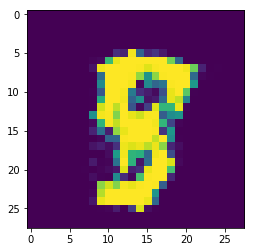

In [210]:
with tf.Session() as sess:
    
    saver = tf.train.Saver()
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, "./checkpoints/model.ckpt")
    
    sampled_noise = sample_Z(1, Z_dim)
    one_hot_sampled = one_hot(1, num_classes, [8])
    
    generated = sess.run(gen_sample, feed_dict={Y: one_hot_sampled, 
                                                Z: sampled_noise})
    img_generated = np.reshape(generated, (28, 28))
    
    plt.imshow(img_generated)
    plt.show()